https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo apasionado de la meteorología que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv", dentro de la carpeta "data"

In [82]:
import pandas as pd
import numpy as np
from sklearn import metrics

df_original = pd.read_csv("data/temps.csv")
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [83]:
df = df_original[[col for col in df_original.columns if 'forecast' not in col]].copy()

In [84]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


### 2. Lidia con las variables categóricas del dataset

In [85]:
df['week'].value_counts()

Tues     52
Sat      50
Fri      50
Mon      49
Sun      49
Thurs    49
Wed      49
Name: week, dtype: int64

In [86]:
entrada = df['week'].iloc[0]

dic_week['Tues']

2

In [87]:
dic_week = {
    'Tues': 2,
    'Sat':  6,
    'Fri':  5,
    'Mon':  1,
    'Sun':  7,
    'Thurs': 4,
    'Wed':  3
}

# df['week'].map(dic_week)
df['n_week'] = df['week'].apply(lambda x: dic_week[x])

# df = pd.get_dummies(df)
df

,year,month,day,week,temp_2,temp_1,average,actual,friend,n_week
0,2016,1,1,Fri,45,45,45.6,45,29,5
1,2016,1,2,Sat,44,45,45.7,44,61,6
2,2016,1,3,Sun,45,44,45.8,41,56,7
3,2016,1,4,Mon,44,41,45.9,40,53,1
4,2016,1,5,Tues,41,40,46.0,44,41,2
...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,47,2
344,2016,12,28,Wed,42,47,45.3,48,58,3
345,2016,12,29,Thurs,47,48,45.3,48,65,4
346,2016,12,30,Fri,48,48,45.4,57,42,5


### 3. Divide en train y test

In [88]:
from sklearn.model_selection import train_test_split

X = df[[col for col in df.columns if col not in ['actual', 'week']]]
Y = df['actual']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state = 42)

### 4. Entrena el modelo y predice
Utiliza un DecisionTreeRegressor

In [89]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=5, random_state=42)

dtr.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [90]:
dtr.score(X_test, Y_test)

0.8266896784944299

### 5. Calcula su MAE (Mean Absolute Error)

Intenta calcularlo sin usar sklearn. Recuerda qué significa este valor, que es el la suma de los valores absolutos de cada error de predicción:

In [91]:
Y_test.values

array([66, 61, 52, 66, 70, 82, 85, 84, 65, 92, 61, 85, 44, 65, 69, 62, 64,
       56, 53, 79, 63, 57, 67, 62, 59, 56, 65, 52, 66, 76, 64, 61, 48, 81,
       77, 57, 58, 47, 68, 51, 77, 56, 73, 51, 59, 87, 58, 81, 58, 42, 49,
       40, 65, 64, 70, 65, 53, 57, 53, 60, 67, 49, 53, 69, 55, 68, 76, 69,
       78, 36], dtype=int64)

In [92]:
predictions = dtr.predict(X_test)
np.abs(predictions - Y_test.values).mean()

4.035759244249139

### 6. Calcula su MAPE (Mean Absolute Percentage Error)

Al igual que el apartado anterior, calcúlalo sin recurrir a sklearn. En este caso lo que tienes que hacer es sacar, por cada registro, su MAE en base al valor de la predicción y promediarlo para todos los registros:

In [93]:
np.mean(np.abs(predictions - Y_test.values)/(Y_test.values))*100

6.506362217408963

### 7. Representa el árbol de decision

### 8. Modifica el max_depth a 3 y vuelve a entrenarlo

### 9. Vuelve a calcular su MAE

### 10. Vuelve a representar su árbol

### 11. Obten el `feature_importances` de cada variable en el último modelo

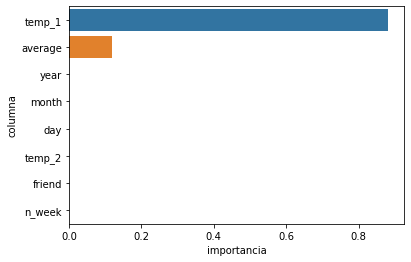

In [108]:
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as  sns

dtr = DecisionTreeRegressor(max_depth=3, random_state=42)

dtr.fit(X_train, Y_train)


# plt.figure(figsize=(30, 8))
# sklearn.tree.plot_tree(dtr,
#                        feature_names=X.columns,
#                        filled = True, fontsize=12);

feature_importances = pd.DataFrame({'columna': X.columns, 'importancia': dtr.feature_importances_})
feature_importances = feature_importances.sort_values(by='importancia', ascending = False)
feature_importances

sns.barplot(
    x=feature_importances['importancia'],
    y=feature_importances['columna'])

In [110]:
pd.Series(dtr.predict(X_test)).value_counts()

72.376812    15
61.370370    11
52.444444    10
58.133333    10
66.083333     9
77.900000     7
41.058824     5
46.000000     3
dtype: int64

### 12. Prueba a crearte nuevas variables que creas que aporten para ver si puedes reducir el error obtenido